In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
folder = '/Users/cdelacroix/Desktop/improved_focus'
files = ['20230725_155205.fits',
         '20230725_155230.fits',
         '20230725_155837.fits',
         '20230725_155901.fits',
         '20230725_160700.fits',
         '20230725_160721.fits']
xoyo = (75, 75)
xmax = 50
part = '001'
nimg = 130
nan_floor = 300

In [3]:
y = np.empty((len(files),xmax))
dataset = np.empty((len(files),nimg,nimg))
for i,file in enumerate(files):
    dataset[i] = np.flipud(fits.getdata(folder + '/' + file)) # image is flipped vertically in the lab
    dataset[i][dataset[i] < nan_floor] = np.nan

In [4]:
def select_square(X0, Y0, R1=15, R2=0):
    X, Y = np.meshgrid(np.arange(nimg),np.arange(nimg))
    dX, dY = np.abs(X-X0), np.abs(Y-Y0)
    return (dX < R1) * (dY < R1) * ~((dX < R2) * (dY < R2))

def get_medians(data, X0, Y0, mag=0.8, figsize=(8,6)):
    fig, axs = plt.subplot_mosaic("AB;CC", figsize=figsize)
    mask_in = select_square(X0,Y0,R1=7,R2=0)
    axs['A'].imshow(data*(1 + mask_in*mag), origin='lower');
    med_in = np.nanmedian(data[mask_in])
    avg_in = np.nanmean(data[mask_in])
    mask_out = select_square(X0,Y0,R1=14,R2=10)
    axs['B'].imshow(data*(1 + mask_out*mag), origin='lower');
    med_out = np.nanmedian(data[mask_out])
    avg_out = np.nanmean(data[mask_out])
    mask_all = select_square(X0,Y0,R1=15,R2=0)
    axs['C'].hist(data[mask_all],bins=100,range=(350,700))
    T = med_in / med_out
    fig.suptitle('(%s,%s); in(median;mean)=%.2f;%.2f out(median;mean)=%.2f;%.2f transmittance=%.4f'
          %(i,j,med_in, avg_in, med_out, avg_out, T))
    return med_in, med_out, avg_in, avg_out, T


## Chrome thickness 150nm

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Users/cdelacroix/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


(0,0); in(median;mean)=nan;nan out(median;mean)=510.59;489.46 transmittance=nan
(1,0); in(median;mean)=400.52;400.33 out(median;mean)=632.58;641.05 transmittance=0.6332
(2,0); in(median;mean)=386.47;403.68 out(median;mean)=634.82;642.68 transmittance=0.6088
(3,0); in(median;mean)=428.46;436.10 out(median;mean)=634.54;639.79 transmittance=0.6752
(4,0); in(median;mean)=nan;nan out(median;mean)=669.28;611.16 transmittance=nan
(0,1); in(median;mean)=418.54;421.84 out(median;mean)=663.06;654.11 transmittance=0.6312
(1,1); in(median;mean)=367.86;368.70 out(median;mean)=631.02;635.24 transmittance=0.5830
(2,1); in(median;mean)=378.34;376.96 out(median;mean)=626.32;627.09 transmittance=0.6041
(3,1); in(median;mean)=389.48;389.09 out(median;mean)=626.26;627.58 transmittance=0.6219
(4,1); in(median;mean)=428.18;423.95 out(median;mean)=616.09;623.38 transmittance=0.6950
(0,2); in(median;mean)=404.02;420.90 out(median;mean)=624.34;644.83 transmittance=0.6471
(1,2); in(median;mean)=372.20;371.77 ou

/Users/cdelacroix/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


(1,4); in(median;mean)=352.27;360.41 out(median;mean)=609.18;604.04 transmittance=0.5783
(2,4); in(median;mean)=376.89;382.53 out(median;mean)=602.90;600.85 transmittance=0.6251
(3,4); in(median;mean)=376.59;375.70 out(median;mean)=603.43;598.11 transmittance=0.6241
(4,4); in(median;mean)=nan;nan out(median;mean)=583.93;577.72 transmittance=nan


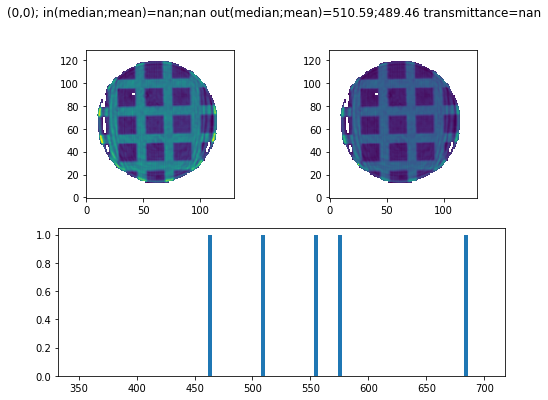

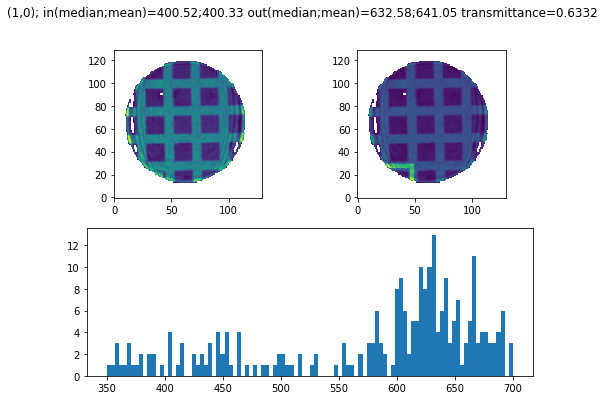

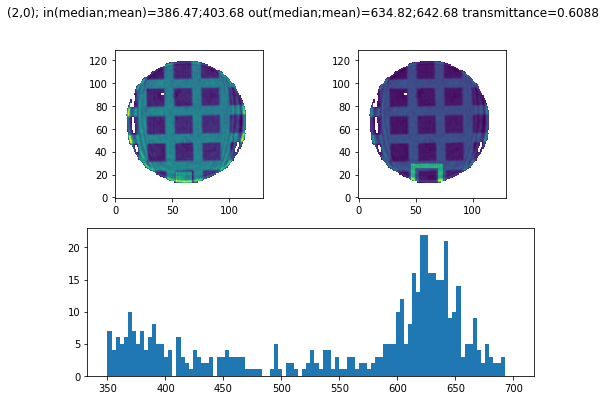

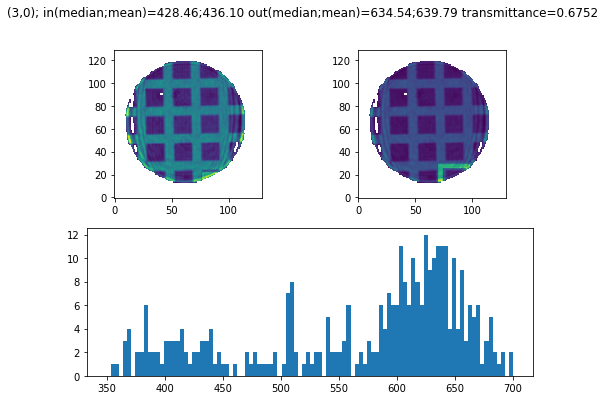

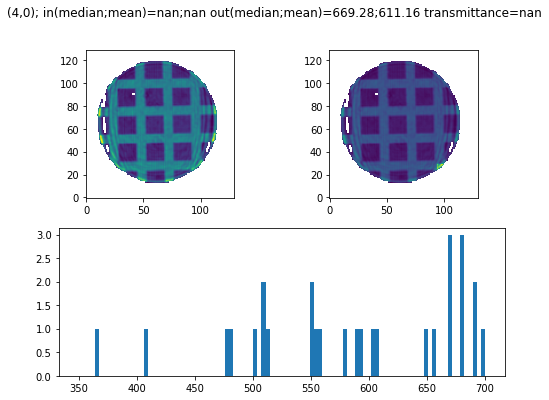

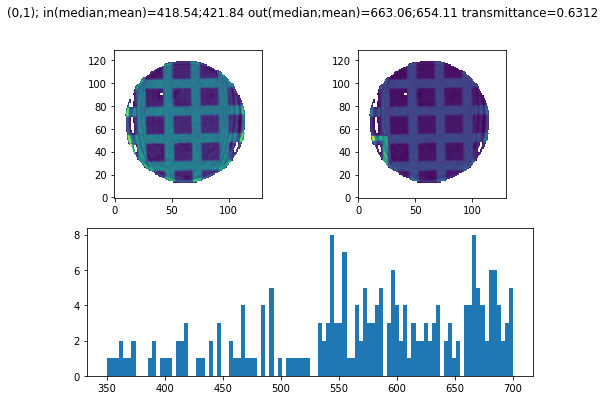

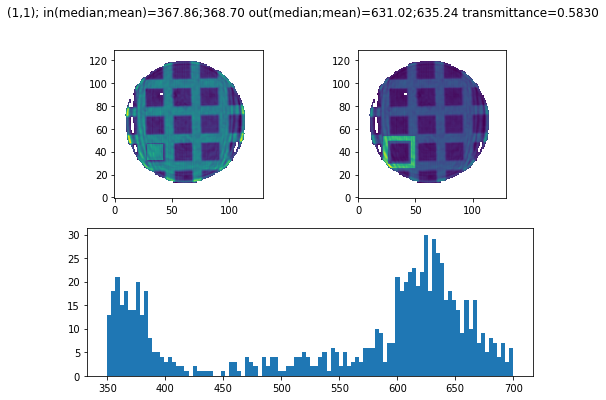

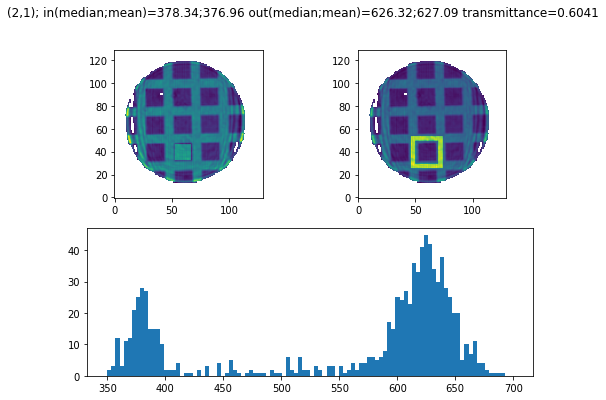

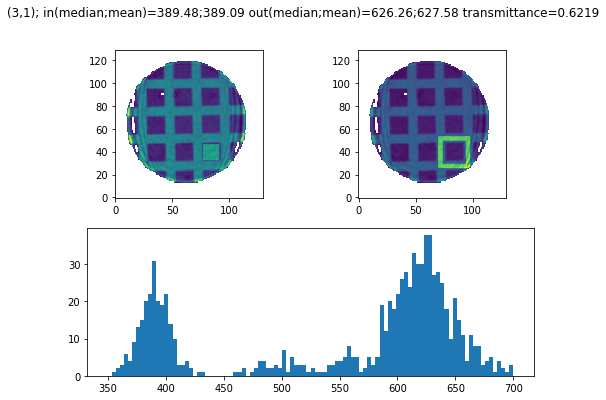

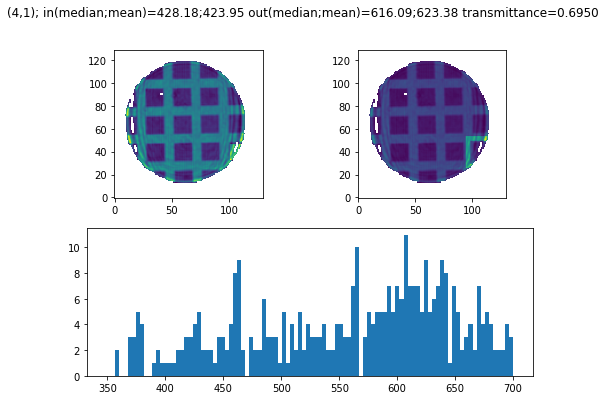

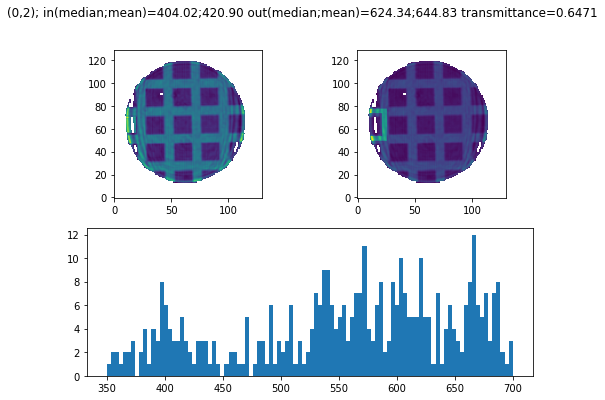

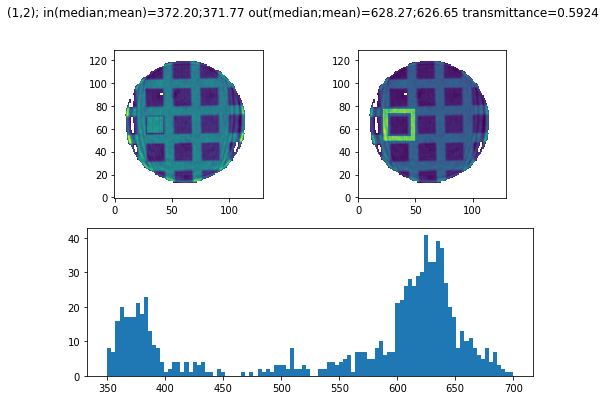

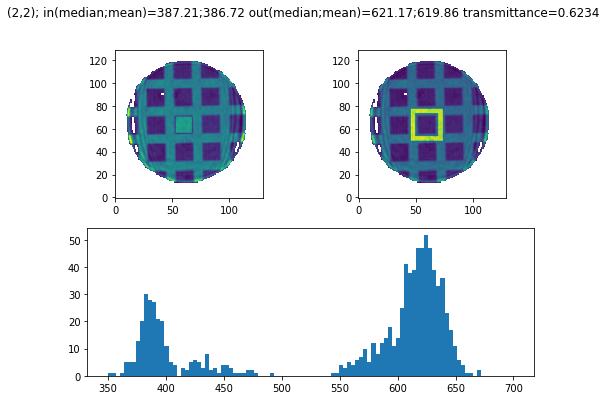

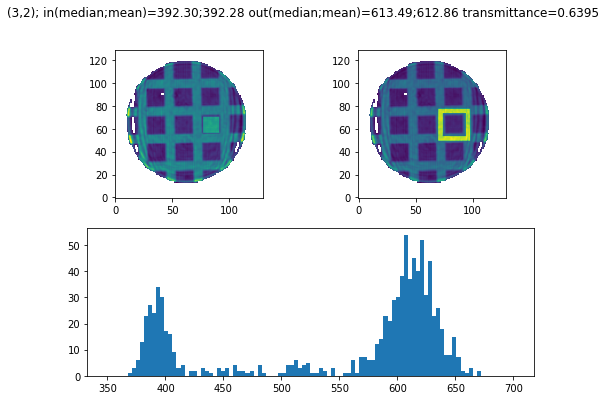

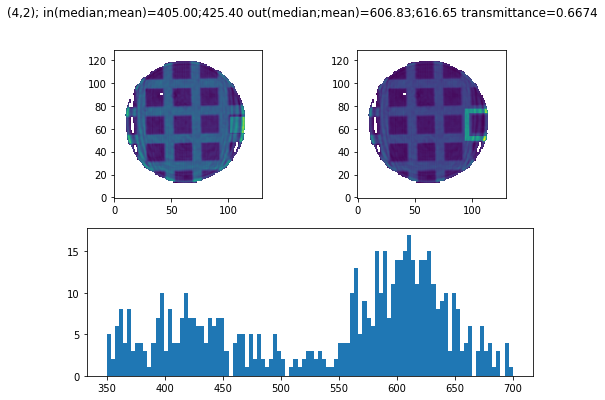

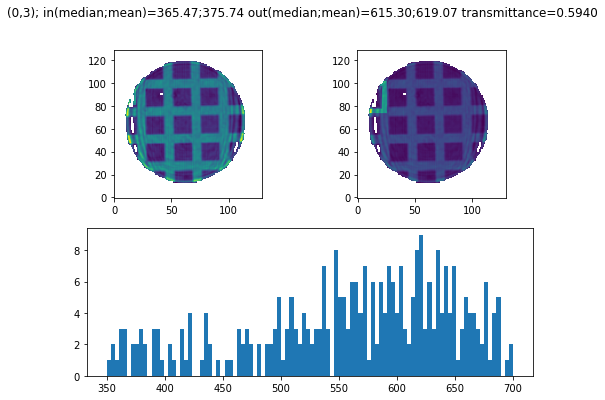

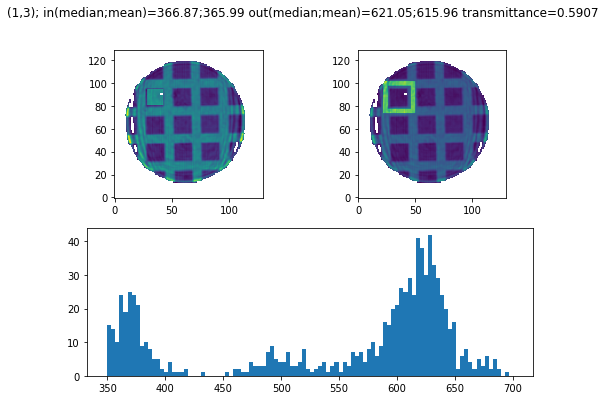

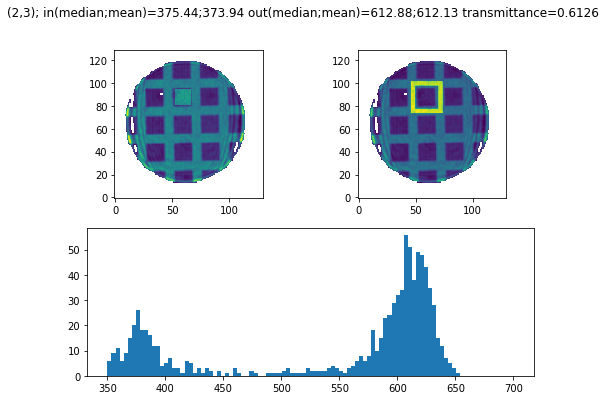

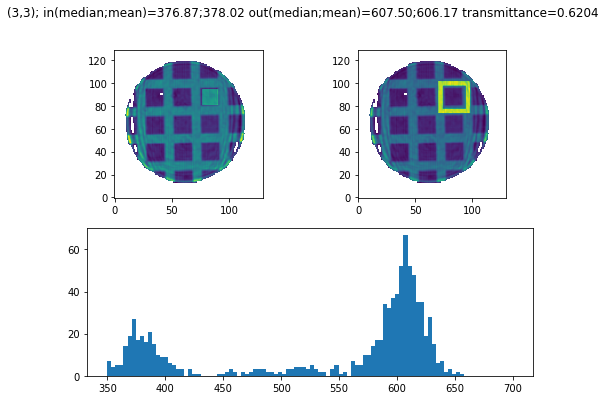

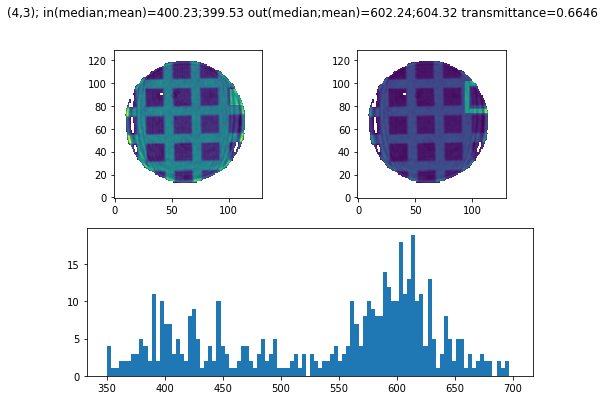

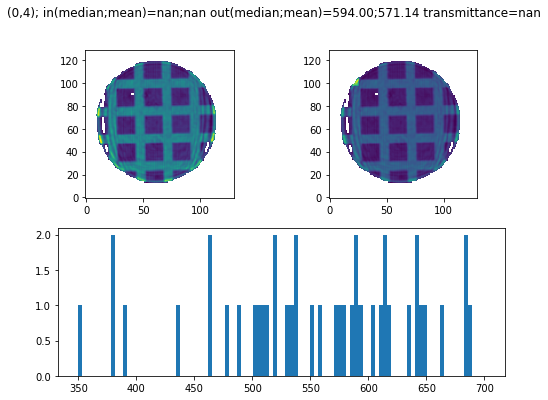

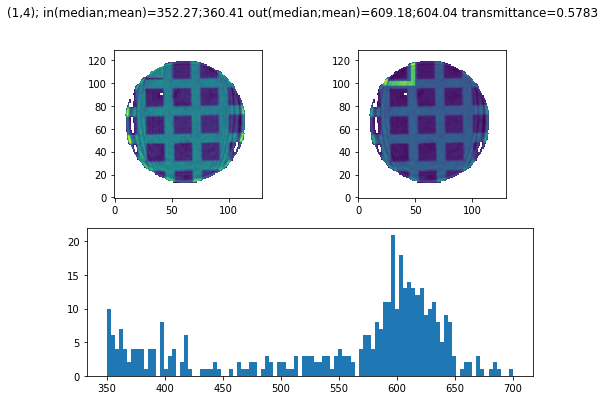

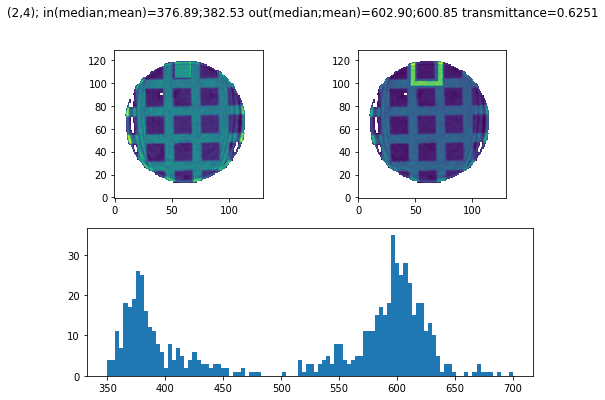

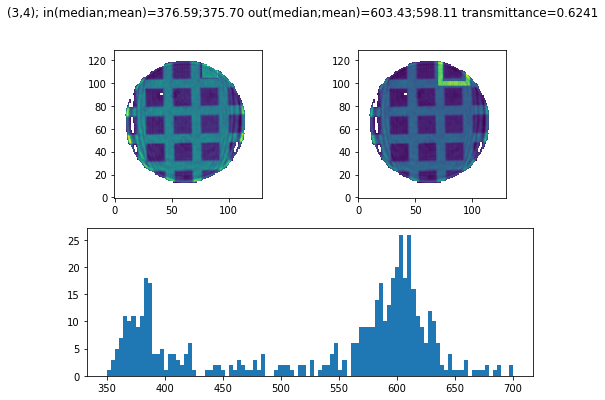

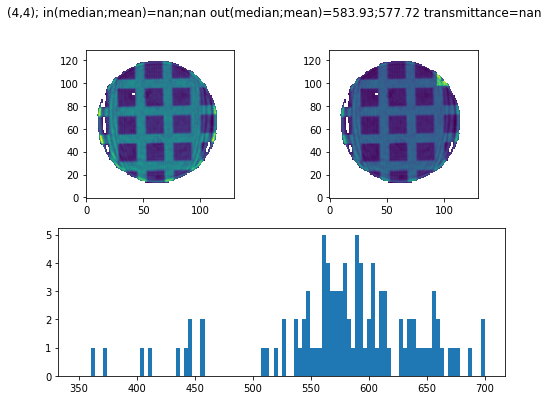

In [10]:
data = dataset[3]
Ts = np.empty((5,5))
X0s = np.arange(11.2,130,24)
Y0s = np.arange(15.5,130,24)
for j,Y0 in enumerate(Y0s):
    for i,X0 in enumerate(X0s):
        med_in, med_out, avg_in, avg_out, T = get_medians(data,X0,Y0)
        Ts[i,j] = T
        print('(%s,%s); in(median;mean)=%.2f;%.2f out(median;mean)=%.2f;%.2f transmittance=%.4f'
            %(i,j,med_in, avg_in, med_out, avg_out, T))

In [6]:
Ts

array([[       nan, 0.64512052, 0.65649539, 0.56869705,        nan],
       [0.6392544 , 0.58829787, 0.59486197, 0.59082999, 0.57647802],
       [0.61592922, 0.60514914, 0.62419711, 0.61070332, 0.62292359],
       [0.68339449, 0.624707  , 0.63974658, 0.61904273, 0.62301706],
       [       nan, 0.70982466, 0.67550321, 0.65878803,        nan]])